A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [58]:

# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original


## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

In [41]:
print(df.head)
print(df.info)


<bound method NDFrame.head of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial     

In [42]:
df.isna().sum()


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [43]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

In [44]:
#limpiamos y sacamos los valores nulos
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  if (await self.run_code(code, result,  async_=asy)):


Text(0.5, 1.0, 'Distribución de Educación')

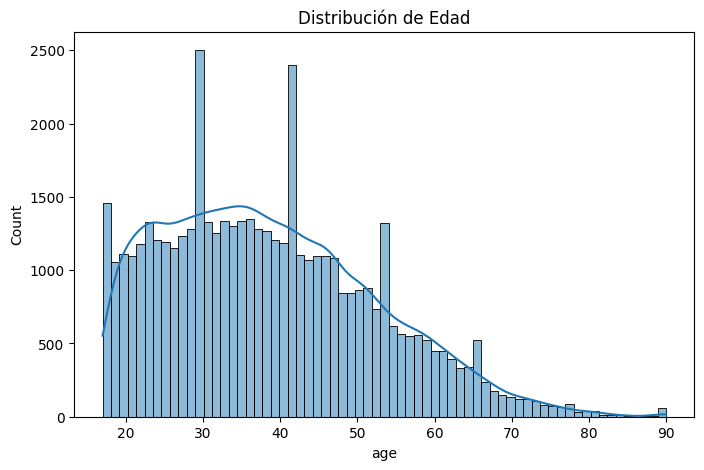

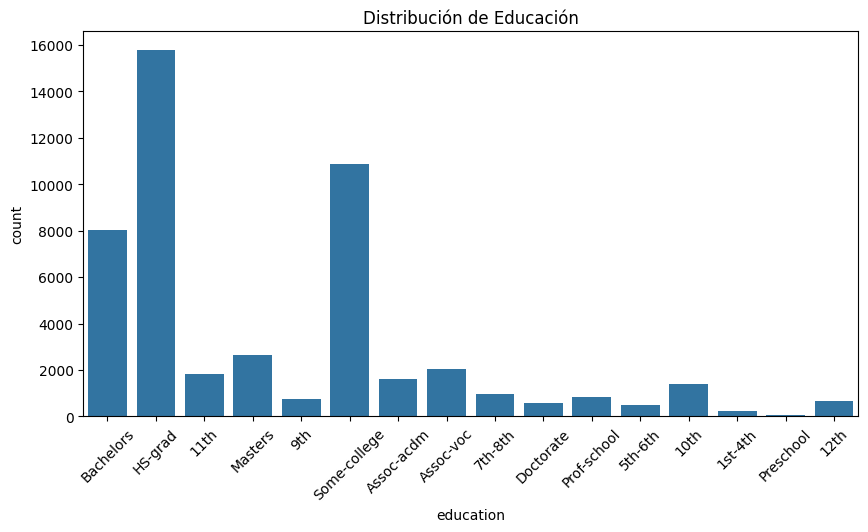

In [45]:
#Para el analisis univariado realizaremos 2 gráficos, el primero será un histograma para estudiar una variable numerica que es edad y
#para el gráfico de barras estudiaremos la variable educación

# Histograma para una variable numérica
df['age'] = df['age'].astype(int)
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Distribución de Edad')

# Gráfico de barras para variable categórica
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education')
plt.xticks(rotation=45)
plt.title('Distribución de Educación')
#Podemos observar que existe una tendencia, donde desde los 20 a los 40 aumenta y luego va dismunuyendo para los individuos que tienen 50 años o más


Text(0.5, 1.0, 'Educación vs Ingreso')

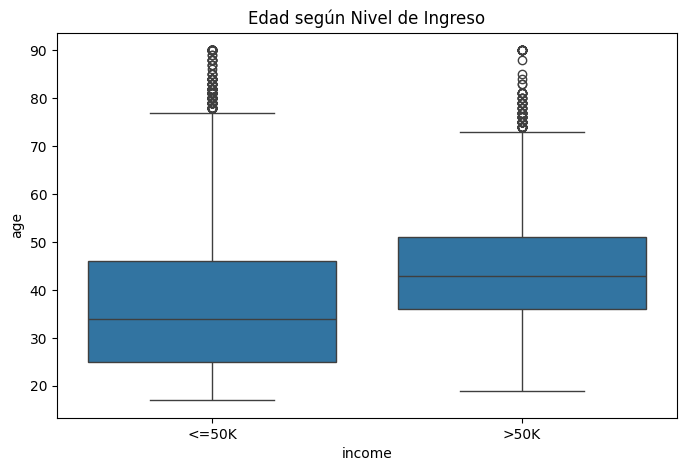

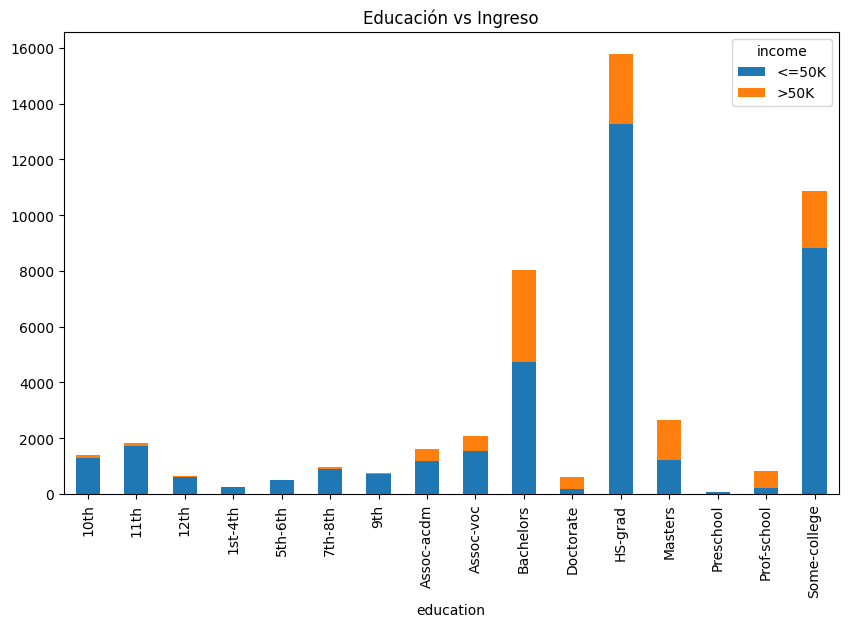

In [46]:
# Para el análisis bivariado vamos a realizar una comparación de la edad con
# el ingreso mediante un boxplot y un gráfico de barras entre las variables
# educación e ingreso ya que queremos saber cómo varían las otras variables
# según si una persona gana más o menos de $50K, que es nuestra variable
# objetivo (target).


#Realizamos una comparación de edad vs ingreso (>50K)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='age')
plt.title('Edad según Nivel de Ingreso')

# Gráfico de barras apiladas: educación vs ingreso
pd.crosstab(df['education'], df['income']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Educación vs Ingreso')


In [ ]:
#En el primer grafico podemos interpretar que la mediana es más alta en los grupos de mayor edad, es decir, más edad, mayor ingreso.

#En el segundo grafico podemos ver donde para cada nivel de profesion, hay ingresos distintos, un ejemplo es en los que obtuvieron doctorado, tienen ingreso sobre 50K. Para los de enseñanza media se concentra un ingreso menor a 50K.
# En conclusión los individuos con mayores ingresos
#cursaron masters, universidad, bachillerato.

Text(0.5, 1.0, 'Matriz de Correlación')

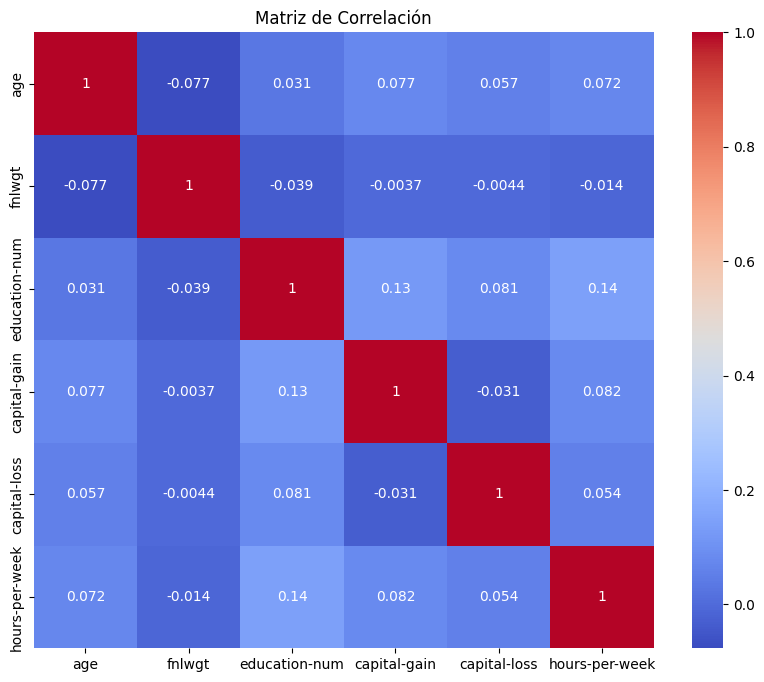

In [47]:
#Correlaciones y selección multivariada

# Seleccionar variables numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# Mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')


In [ ]:
#Podemos conlcuir que no hay correlaciones fuertes y no hay multicolinealidad severa y la variable educacion es la que esta más correlacionada con las demás.

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [59]:
# Tomamos la mitad de datos de manera aleatoria para que no nos tire error al ser tantos datos.
df_mitad = df.sample(frac=0.5, random_state=42)
df_mitad['income'] = df_mitad['income'].str.strip().str.replace('.', '', regex=False)
df_mitad['income'] = df_mitad['income'].apply(lambda x: 1 if x == '>50K' else 0)
X = pd.get_dummies(df_mitad.drop('income', axis=1), drop_first=True)
y = df_mitad['income']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicializar modelo
rf = RandomForestClassifier(random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred = rf.predict(X_test)


In [50]:
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3711
        >50K       0.75      0.61      0.67      1174

    accuracy                           0.86      4885
   macro avg       0.82      0.77      0.79      4885
weighted avg       0.85      0.86      0.85      4885

